In [1]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import *
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

In [2]:
def create_circuit(theta, show=False):
    q = QuantumRegister(2)
    qc = QuantumCircuit(q)
    x = RXGate(np.pi/2)
    y = RYGate(np.pi/2)
    z = RZGate(np.pi/2)
    
    qc.x(q[1])
    qc.rx(-3*np.pi/2, q[1])
    qc.ry(np.pi/2, q[0])
    qc.cnot(q[0], q[1])
    qc.rz(theta, q[1])
    qc.cnot(q[0], q[1])
    qc.ry(-3*np.pi/2, q[0])
    qc.rx(np.pi/2, q[1])
    qc.measure_all()
    if show:
        cplot=qc.draw(output='mpl')
        display(cplot)
    return qc

def create_probabilities(state_distribution):
    return state_distribution / np.sum(state_distribution)

# ZI = |a|^2 + |b|^2 - |c|^2 - |d|^2
def zi(prob):
    return prob[0] + prob[1] - prob[2] - prob[3]

# IZ = |a|^2 - |b|^2 + |c|^2 - |d|^2
def iz(prob):
    return prob[0] - prob[1] + prob[2] - prob[3]

# XX = 2*ad + 2*cb
def xx(prob):
    return 2*np.sqrt(prob[0]*prob[3]) + 2*np.sqrt(prob[1]*prob[2])

# YY = -2*ad + 2*cb
def yy(prob):
    return -2*np.sqrt(prob[0]*prob[3]) + 2*np.sqrt(prob[1]*prob[2])

# ZZ = |a|^2 - |b|^2 - |c|^2 + |d|^2
def zz(prob):
    return prob[0] - prob[1] - prob[2] + prob[3]

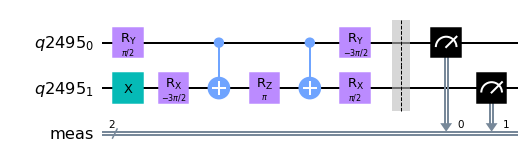

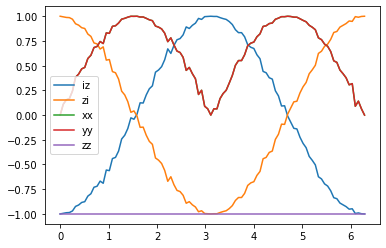

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
results = {'iz': [], 'zi': [], 'xx': [], 'yy': [], 'zz': []}
qc = create_circuit(np.pi, True)
thetas = np.linspace(0, 2 * np.pi, 100)
for theta in thetas:
    qc = create_circuit(theta)
    job = execute(qc, backend=backend, shots=1000)
    result = job.result()
    # Get counts and plot histogram
    counts = result.get_counts()
    distribution = np.zeros(4)
    for key in counts:
        distribution[int('0b' + key, 2)] += counts[key]
    probabilities = create_probabilities(distribution)
    results['iz'].append(iz(probabilities))
    results['zi'].append(zi(probabilities))
    results['xx'].append(xx(probabilities))
    results['yy'].append(yy(probabilities))
    results['zz'].append(zz(probabilities))
plt.plot(thetas, results['iz'], label='iz')
plt.plot(thetas, results['zi'], label='zi')
plt.plot(thetas, results['xx'], label='xx')
plt.plot(thetas, results['yy'], label='yy')
plt.plot(thetas, results['zz'], label='zz')
plt.legend()
plt.show()


aa


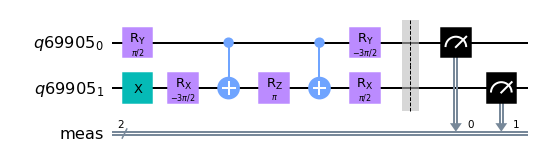

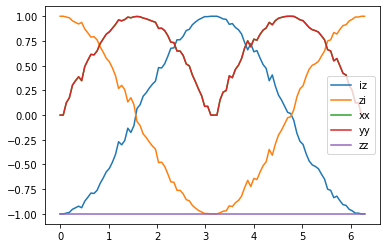

In [30]:
authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)

qi_backend = QI.get_backend('QX single-node simulator')

if 'Spin-2' in [str(a) for a in QI.backends()]:
    qi_backend = QI.get_backend('Spin-2')

results = {'iz': [], 'zi': [], 'xx': [], 'yy': [], 'zz': []}
qc = create_circuit(np.pi, True)
thetas = np.linspace(0, 2 * np.pi, 100)
for theta in thetas:
    qc = create_circuit(theta)
    job = execute(qc, backend=backend, shots=512)
    result = job.result()
    # Get counts and plot histogram
    counts = result.get_counts()
    distribution = np.zeros(4)
    for key in counts:
        distribution[int('0b' + key, 2)] += counts[key]
    probabilities = create_probabilities(distribution)
    results['iz'].append(iz(probabilities))
    results['zi'].append(zi(probabilities))
    results['xx'].append(xx(probabilities))
    results['yy'].append(yy(probabilities))
    results['zz'].append(zz(probabilities))
plt.plot(thetas, results['iz'], label='iz')
plt.plot(thetas, results['zi'], label='zi')
plt.plot(thetas, results['xx'], label='xx')
plt.plot(thetas, results['yy'], label='yy')
plt.plot(thetas, results['zz'], label='zz')
plt.legend()
plt.show()